In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(1)

# Example preparation
* https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

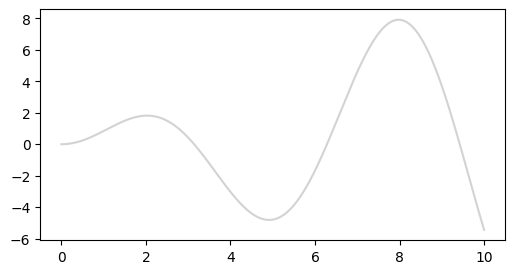

In [2]:
X = np.linspace(0, 10, 1000).reshape(-1, 1)
y = np.squeeze(X*np.sin(X))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray")

fig.savefig("./121_gpr1_1.png")

In [3]:
# sample
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train = X[training_indices]
X_train_noisy = np.array(X[training_indices].tolist()*10)
X_train

array([[5.07507508],
       [8.18818819],
       [4.52452452],
       [3.68368368],
       [2.42242242],
       [9.2992993 ]])

In [4]:
noise_std = 1
y_train = y[training_indices]
y_train_noisy = np.array(list(y[training_indices])*10) + rng.normal(0, noise_std, size=y_train.shape[0]*10)

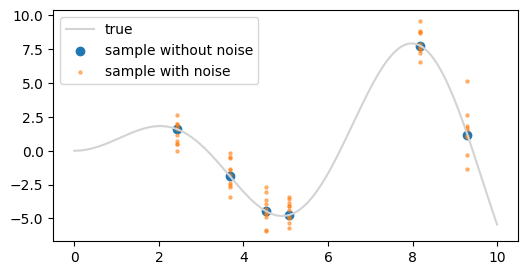

In [5]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")
ax.scatter(X_train_noisy, y_train_noisy, label="sample with noise", s=5, alpha=0.5)
ax.legend()

fig.savefig("./121_gpr1_2.png")

# Gaussian Process

## Without noise

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9)
gpr.fit(X_train, y_train)
print(gpr.kernel_)

5.02**2 * RBF(length_scale=1.43)


In [7]:
gpr.kernel_.theta

array([3.22768918, 0.36022098])

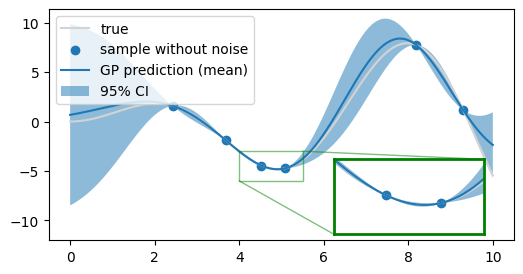

In [8]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.13, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_3.png")

## With noise

### raw data

In [9]:
kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, alpha=0.5)
gpr.fit(X_train_noisy, y_train_noisy)
print(gpr.kernel_)

4.92**2 * RBF(length_scale=1.37)


In [10]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

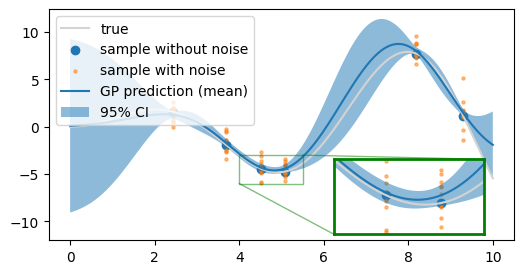

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")
ax.scatter(X_train_noisy, y_train_noisy, label="sample with noise", s=5, alpha=0.5)

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.13, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.scatter(X_train_noisy, y_train_noisy, label="sample with noise", s=5, alpha=0.5)
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_4.png")

In [19]:
kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, alpha=1)
gpr.fit(X_train_noisy, y_train_noisy)
print(gpr.kernel_)

4.84**2 * RBF(length_scale=1.34)


In [20]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

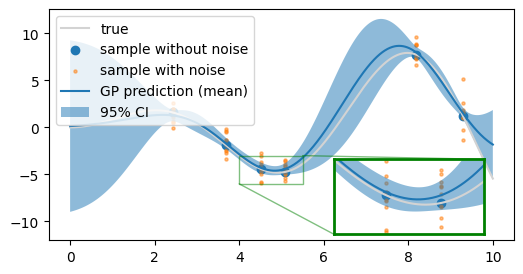

In [21]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")
ax.scatter(X_train_noisy, y_train_noisy, label="sample with noise", s=5, alpha=0.5)

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.13, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.scatter(X_train_noisy, y_train_noisy, label="sample with noise", s=5, alpha=0.5)
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_8.png")

### Standard Deviation input in RBF

In [22]:
import pandas as pd

df_noisy = pd.DataFrame({"X_noisy":X_train_noisy.ravel(), "y_noisy":y_train_noisy})
dfg_noisy = df_noisy.groupby("X_noisy").std()
std = dfg_noisy.mean().values[0]
print(std)

1.0616168585081918


In [23]:
kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, alpha=1**2)
gpr.fit(X_train, y_train)
print(gpr.kernel_)

4.39**2 * RBF(length_scale=1.16)


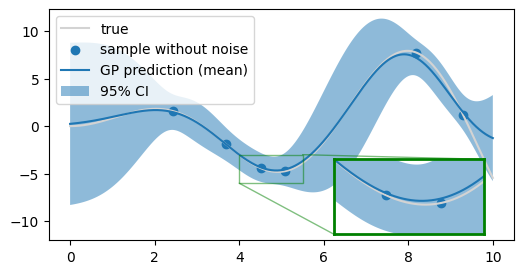

In [24]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.13, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_5.png")

### Variation by parameter range

In [15]:
kernel = 1*RBF(length_scale=100, length_scale_bounds=(10, 1e3))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, alpha=1**2)
gpr.fit(X_train, y_train)
print(gpr.kernel_)

316**2 * RBF(length_scale=10)


/opt/conda/envs/py39/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/envs/py39/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 10.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


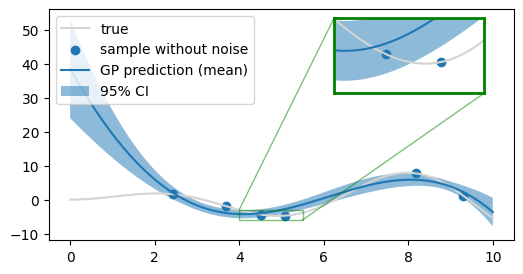

In [16]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.6, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_6.png")

In [17]:
kernel = 1*RBF(length_scale=0.01, length_scale_bounds=(1e-4, 1e-1))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, alpha=1**2)
gpr.fit(X_train, y_train)
print(gpr.kernel_)

4.16**2 * RBF(length_scale=0.01)


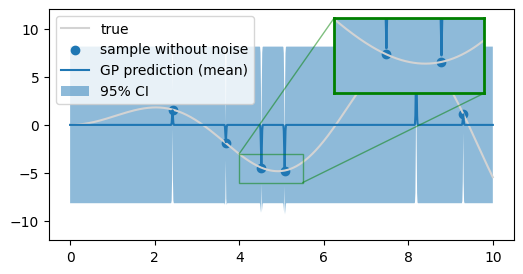

In [18]:
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")

ax.plot(X.ravel(), y_pred_mean, c="C0", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
ax.legend(loc="upper left")
ax.set_ylim(ymin=-12)

axin = fig.add_axes([0.6, 0.6, 0.25, 0.25])
axin.set(xticks=[], yticks=[], xlim=(4, 5.5), ylim=(-6, -3))
axin.plot(X, y, c="lightgray", label="true")
axin.scatter(X_train, y_train, label="sample without noise")
axin.plot(X.ravel(), y_pred_mean, c="C0")
axin.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="C0", label="95% CI")
axin.spines[:].set_color("green")
axin.spines[:].set_linewidth(2)
ax.indicate_inset_zoom(axin, edgecolor="green")

fig.savefig("./121_gpr1_7.png")